# Классификационное дерево
Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». 

- На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция
- В «листьях» записаны значения целевой функции
- В остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Каждый лист представляет собой значение целевой переменной, изменённой в ходе движения от корня по рёбрам дерева до листа. Каждый внутренний узел сопоставляется с одной из входных переменных.


# Лабораторная работа

In [13]:
# Используемые библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Загружаем датасет

cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Выбираем признаки, обозначающие средние значения
columns_to_drop = list(cancer_df.columns[11:30])
cancer_df.drop(columns=columns_to_drop, inplace=True)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260


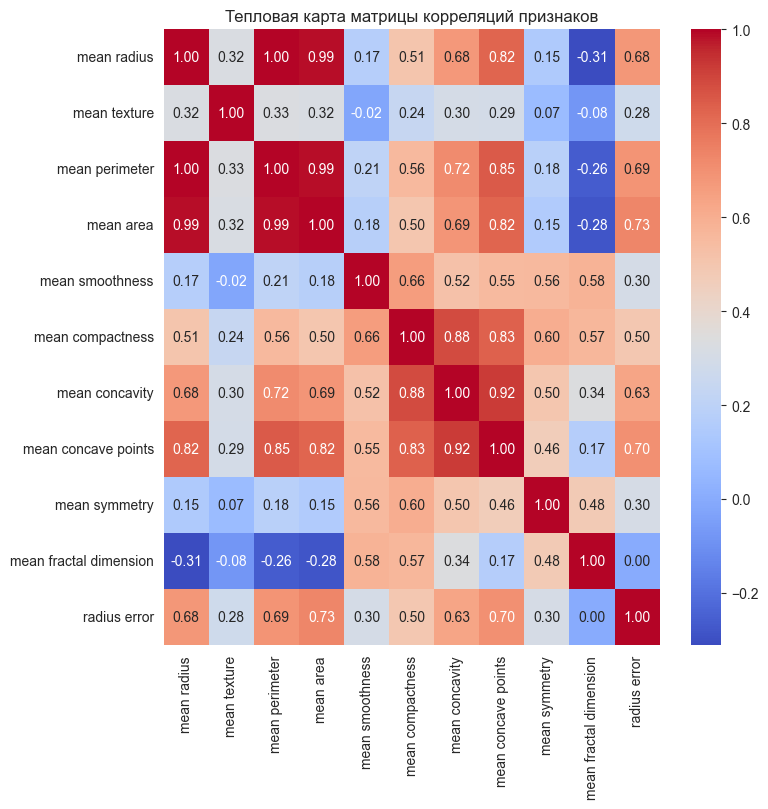

In [5]:
# Получаем матрицу корреляций
correlation_matrix = cancer_df.corr()

# Строим тепловую карту
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [6]:
# Отбор признаков
# Порог корреляции = 0.65

columns_to_drop = [
    'mean concave points', 
    'mean concavity', 
    'mean compactness', 
    'mean perimeter',
    'mean area'
]

cancer_df.drop(columns=columns_to_drop, inplace=True)
cancer_df

,mean radius,mean texture,mean smoothness,mean symmetry,mean fractal dimension,radius error
0,17.99,10.38,0.11840,0.2419,0.07871,1.0950
1,20.57,17.77,0.08474,0.1812,0.05667,0.5435
2,19.69,21.25,0.10960,0.2069,0.05999,0.7456
3,11.42,20.38,0.14250,0.2597,0.09744,0.4956
4,20.29,14.34,0.10030,0.1809,0.05883,0.7572
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,0.05623,1.1760
565,20.13,28.25,0.09780,0.1752,0.05533,0.7655
566,16.60,28.08,0.08455,0.1590,0.05648,0.4564
567,20.60,29.33,0.11780,0.2397,0.07016,0.7260


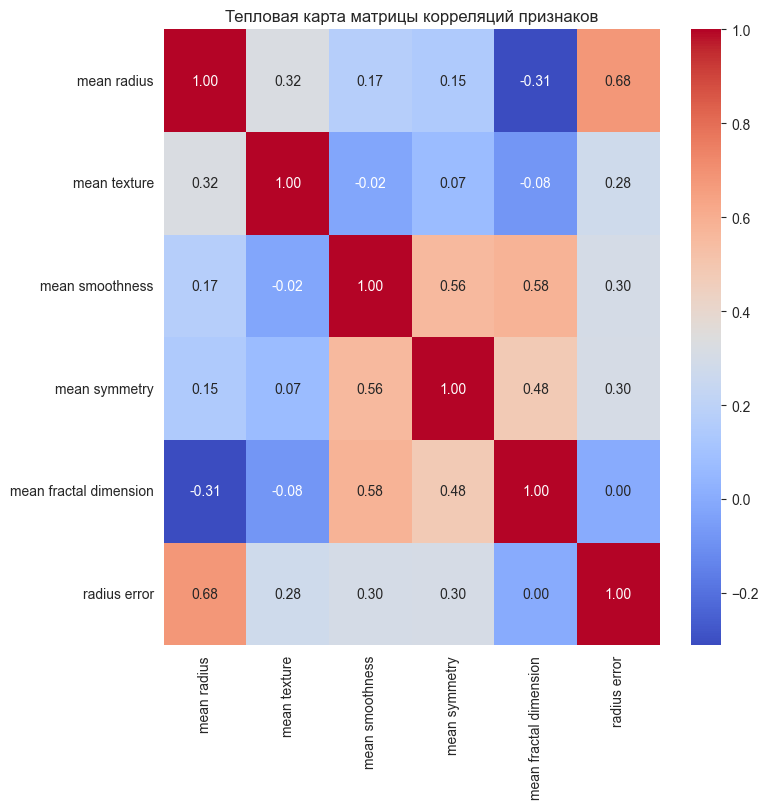

In [7]:
# Получаем матрицу корреляций
correlation_matrix = cancer_df.corr()

# Строим тепловую карту
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [8]:
# Получение выборок

X = cancer_df
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Обучение модели
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.868421052631579

In [14]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
col = cancer_df.columns

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.6623, 'mean radius'],
 [0.1171, 'mean texture'],
 [0.1103, 'mean smoothness'],
 [0.0594, 'radius error'],
 [0.0258, 'mean symmetry'],
 [0.0251, 'mean fractal dimension']]

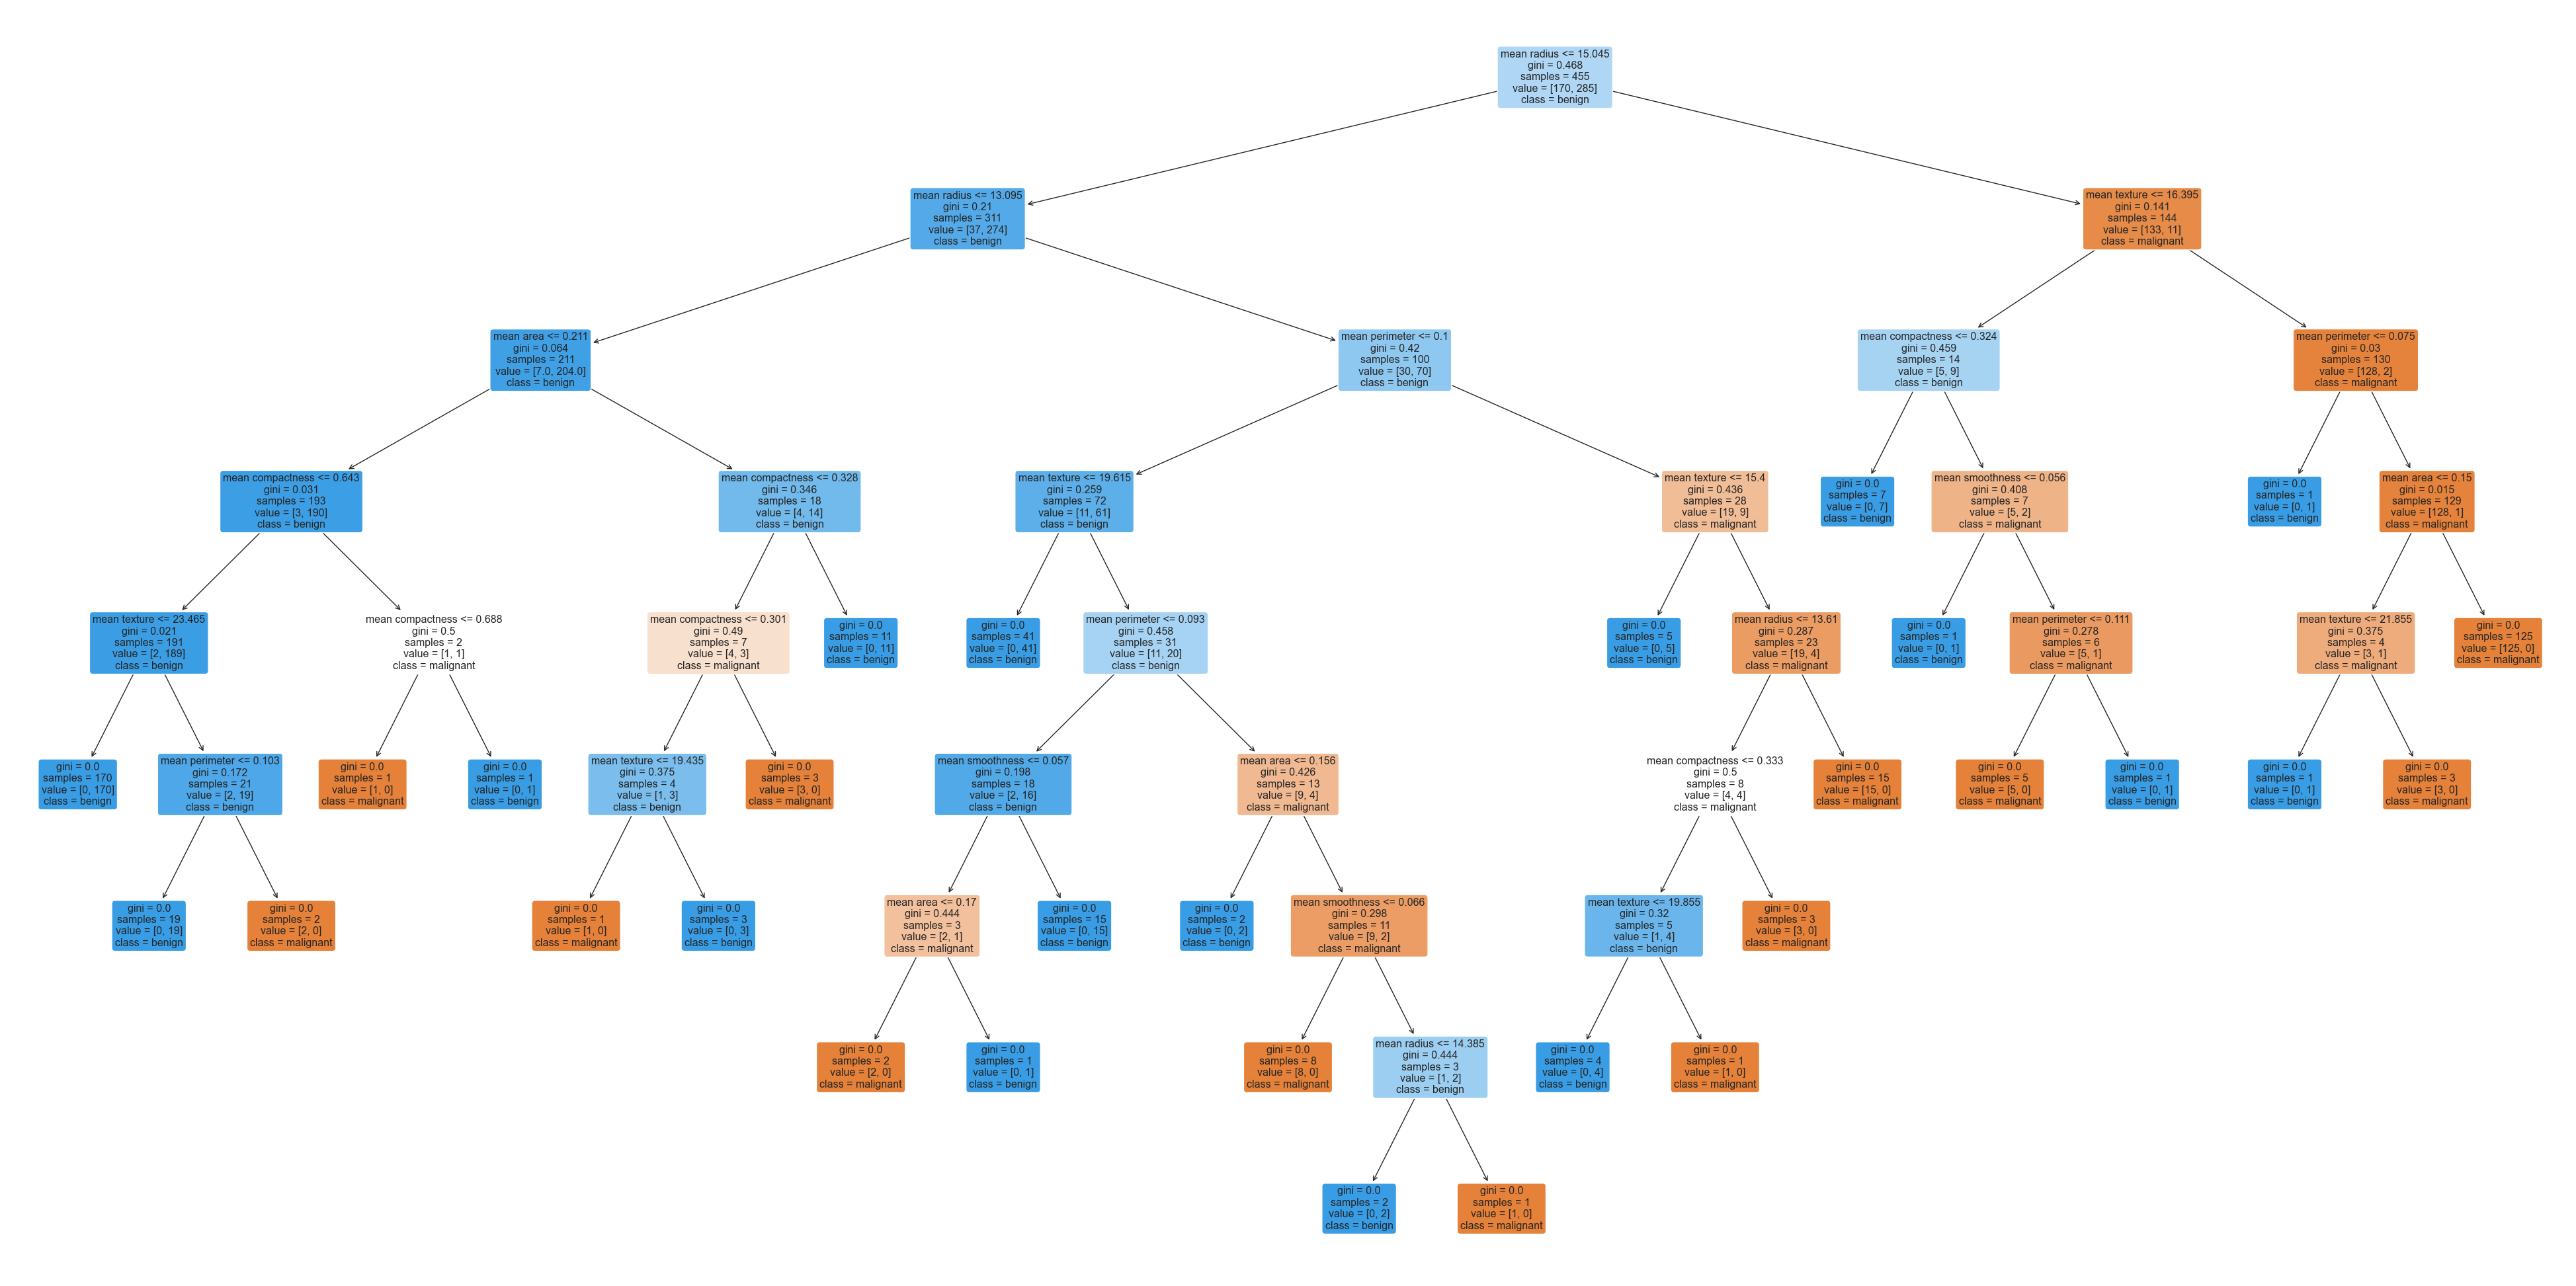

In [12]:
# Визуализируем дерево решений
plt.figure(figsize=(50,25))
plot_tree(model, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, rounded=True)
plt.show()